In [1]:
# 1.Feature Selection

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from pickle import dump

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

In [3]:
# 读取数据
dataset = pd.read_excel('C:/Users/FM94.3/Desktop/samples.xls')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CH3COOH           74 non-null     int64  
 1   C2H2O4·2H2O       74 non-null     int64  
 2   C6H8O7            74 non-null     int64  
 3   H2SO4             74 non-null     int64  
 4   HNO3              74 non-null     int64  
 5   H3PO4             74 non-null     int64  
 6   Immersion time    74 non-null     int64  
 7   Cleaning rates    74 non-null     float64
 8   Roughness         74 non-null     float64
 9   Material removed  74 non-null     float64
 10  pH                74 non-null     float64
 11  Cu                74 non-null     float64
 12  Fe                74 non-null     float64
 13  Ni                74 non-null     float64
 14  Corrosion rate    74 non-null     float64
dtypes: float64(8), int64(7)
memory usage: 8.8 KB


In [4]:
# 去掉有空白的行
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CH3COOH           74 non-null     int64  
 1   C2H2O4·2H2O       74 non-null     int64  
 2   C6H8O7            74 non-null     int64  
 3   H2SO4             74 non-null     int64  
 4   HNO3              74 non-null     int64  
 5   H3PO4             74 non-null     int64  
 6   Immersion time    74 non-null     int64  
 7   Cleaning rates    74 non-null     float64
 8   Roughness         74 non-null     float64
 9   Material removed  74 non-null     float64
 10  pH                74 non-null     float64
 11  Cu                74 non-null     float64
 12  Fe                74 non-null     float64
 13  Ni                74 non-null     float64
 14  Corrosion rate    74 non-null     float64
dtypes: float64(8), int64(7)
memory usage: 8.8 KB


In [5]:
# 将数据分成X和y
y = dataset['Corrosion rate']
X = dataset.drop(['Corrosion rate'], axis=1)

In [6]:
# Pearson Correlation Analysis

<Figure size 5400x4800 with 0 Axes>

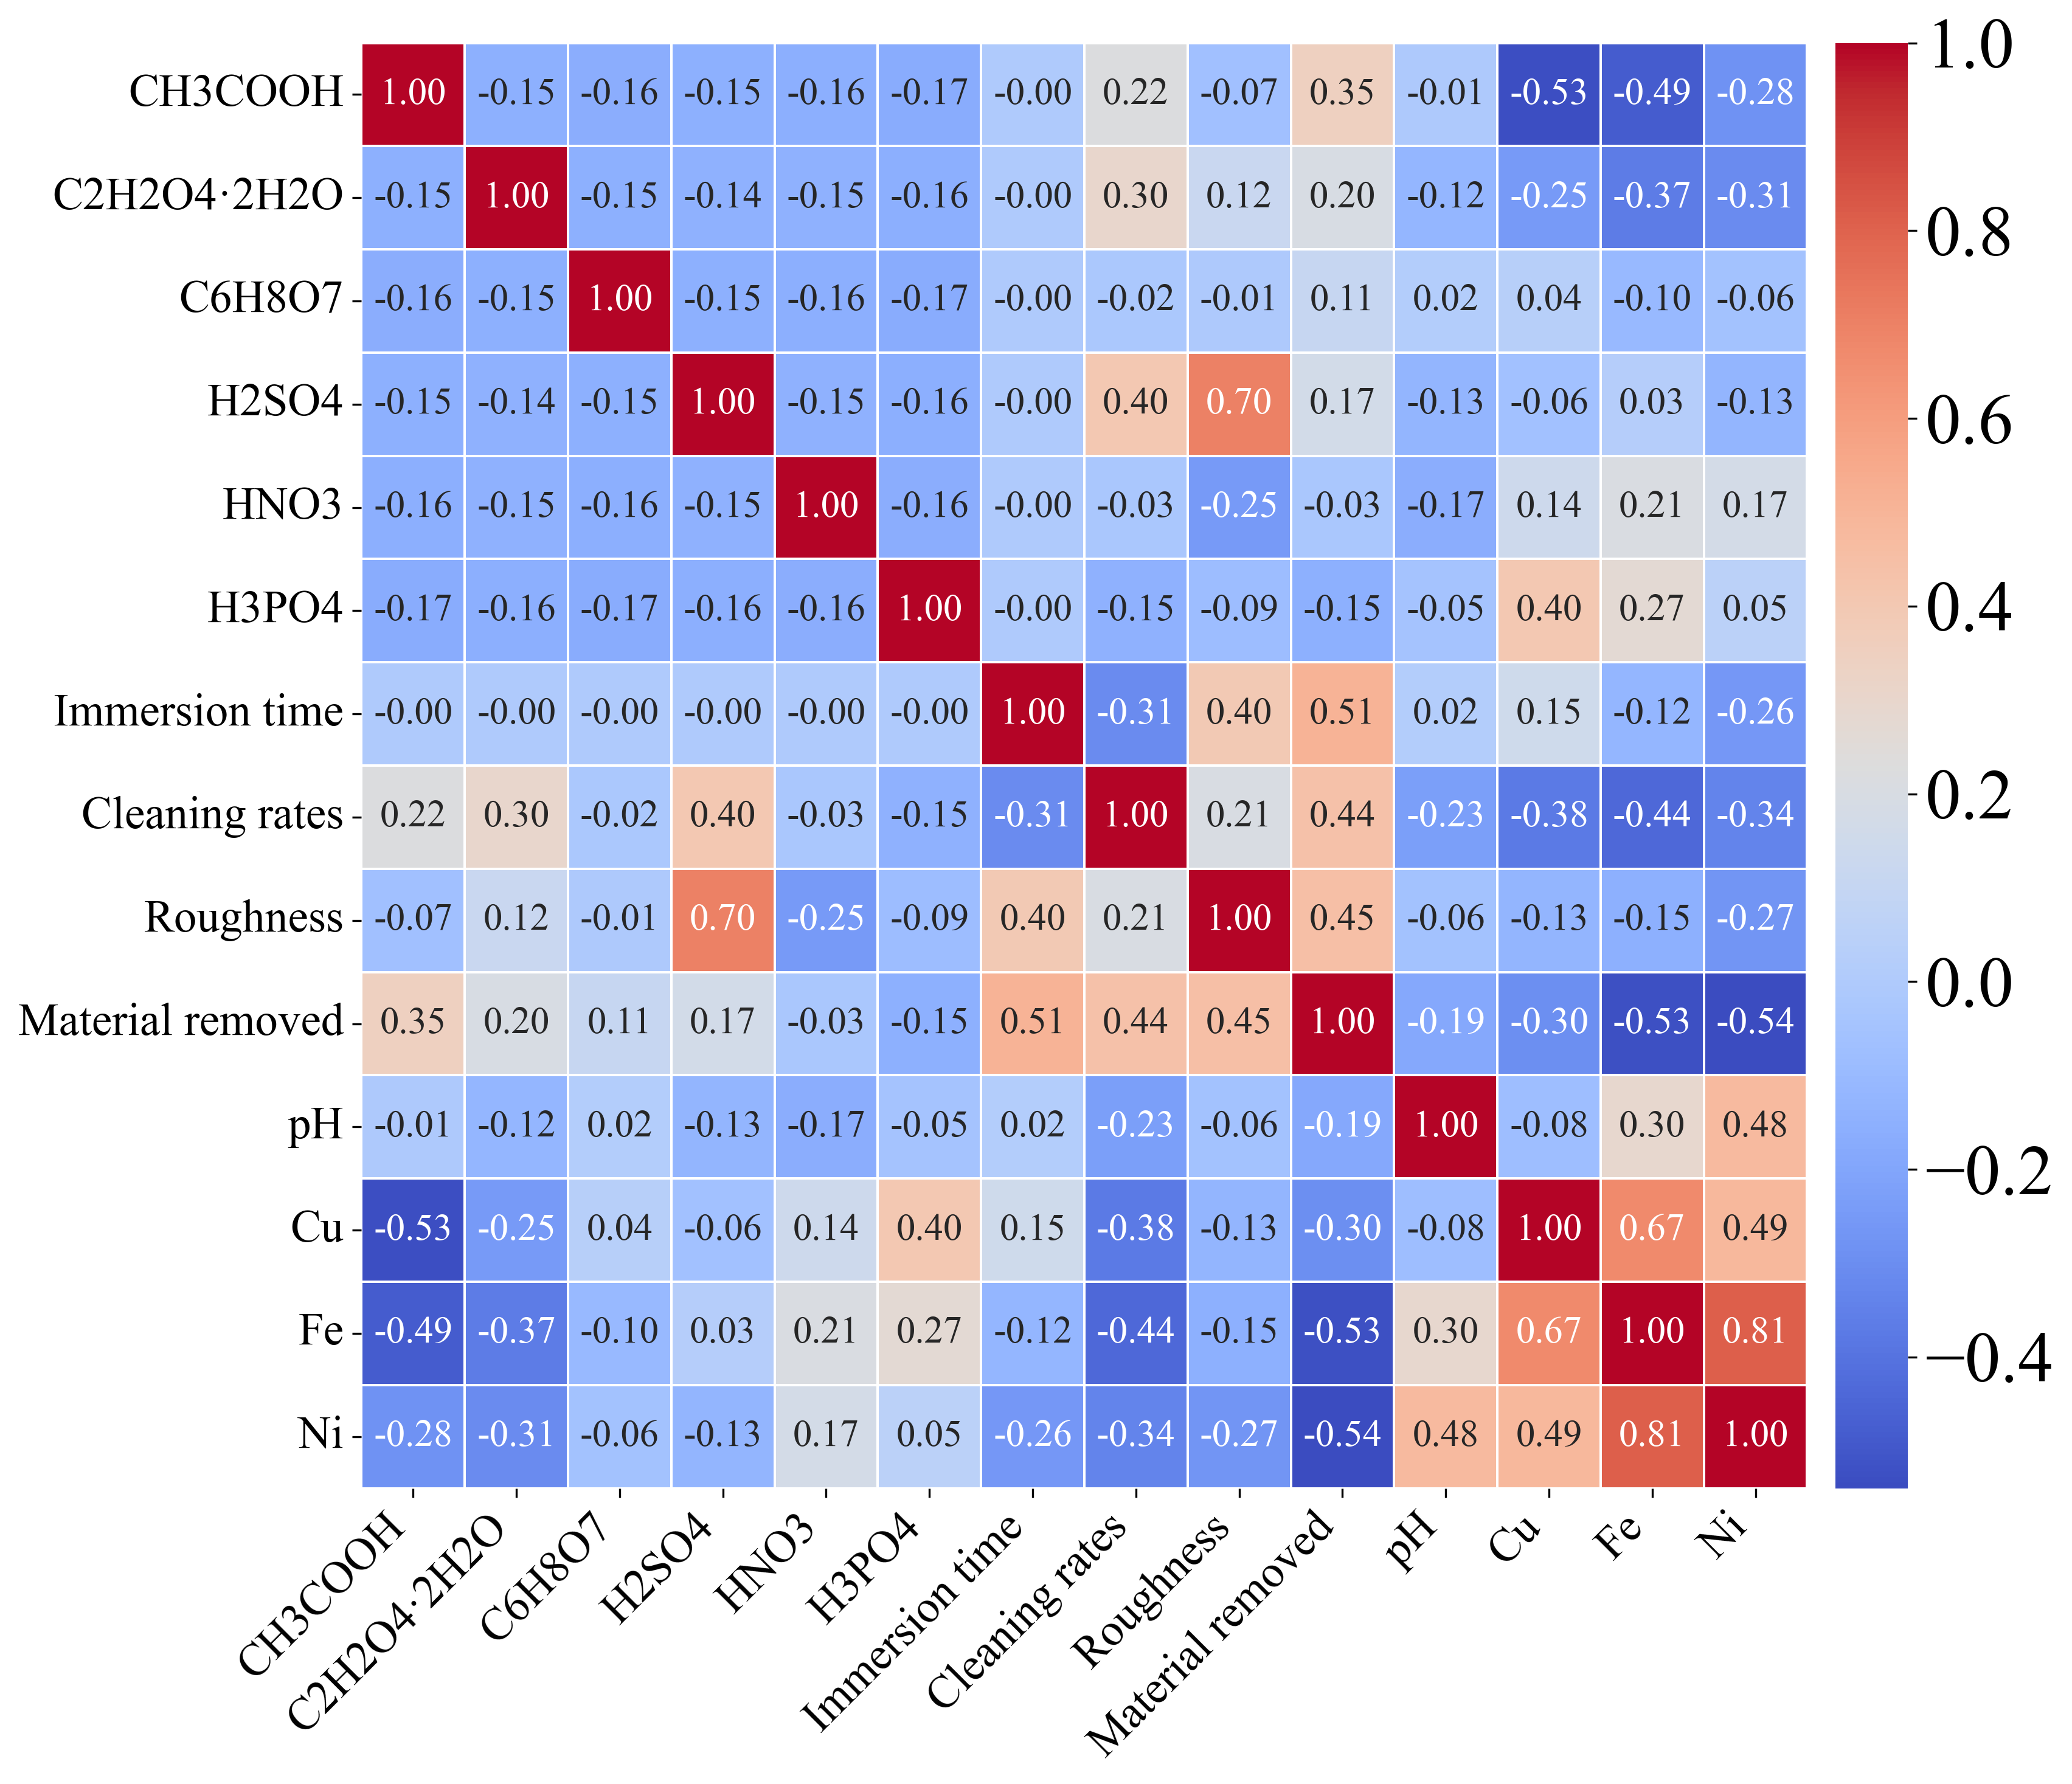

In [14]:
P = dataset[['CH3COOH', 'C2H2O4·2H2O', 'C6H8O7', 'H2SO4', 'HNO3', 'H3PO4','Immersion time', 'Cleaning rates','Roughness','Material removed','pH', 'Cu', 'Fe', 'Ni']]
corr=P.corr(method='pearson')

# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(18, 16))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# 生成一个和相关系数矩阵相同大小的矩阵，并把它的主对角线上的元素设为1
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = False
mask[np.diag_indices_from(mask)] = False

# 绘制相关系数矩阵的热力图
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=corr.round(2), cmap='coolwarm', linewidths=0.5, annot_kws={"size": 15}, mask=mask, fmt='.2f',
           cbar_kws={"shrink": 1, "pad": 0.01},
           square=True)  


# ax.set_aspect("equal")  

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.tight_layout()

plt.savefig("correlation_heatmap.png", dpi=600, bbox_inches="tight")
plt.show()


In [15]:
# 根据相关系数选择特征
threshold = 0.8  # 设置相关系数阈值
high_corr = np.where(abs(corr) > threshold)
high_corr = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print('Highly correlated features:', high_corr)

Highly correlated features: [('Fe', 'Ni')]


In [16]:
# Analysis of the Importance of Features in Random Forest Models

In [17]:
from sklearn.model_selection import train_test_split


# 将数据分成X和y轴
y = dataset['Corrosion rate']
X = dataset.drop(['Corrosion rate'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150,
                                                    )

# 归一化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

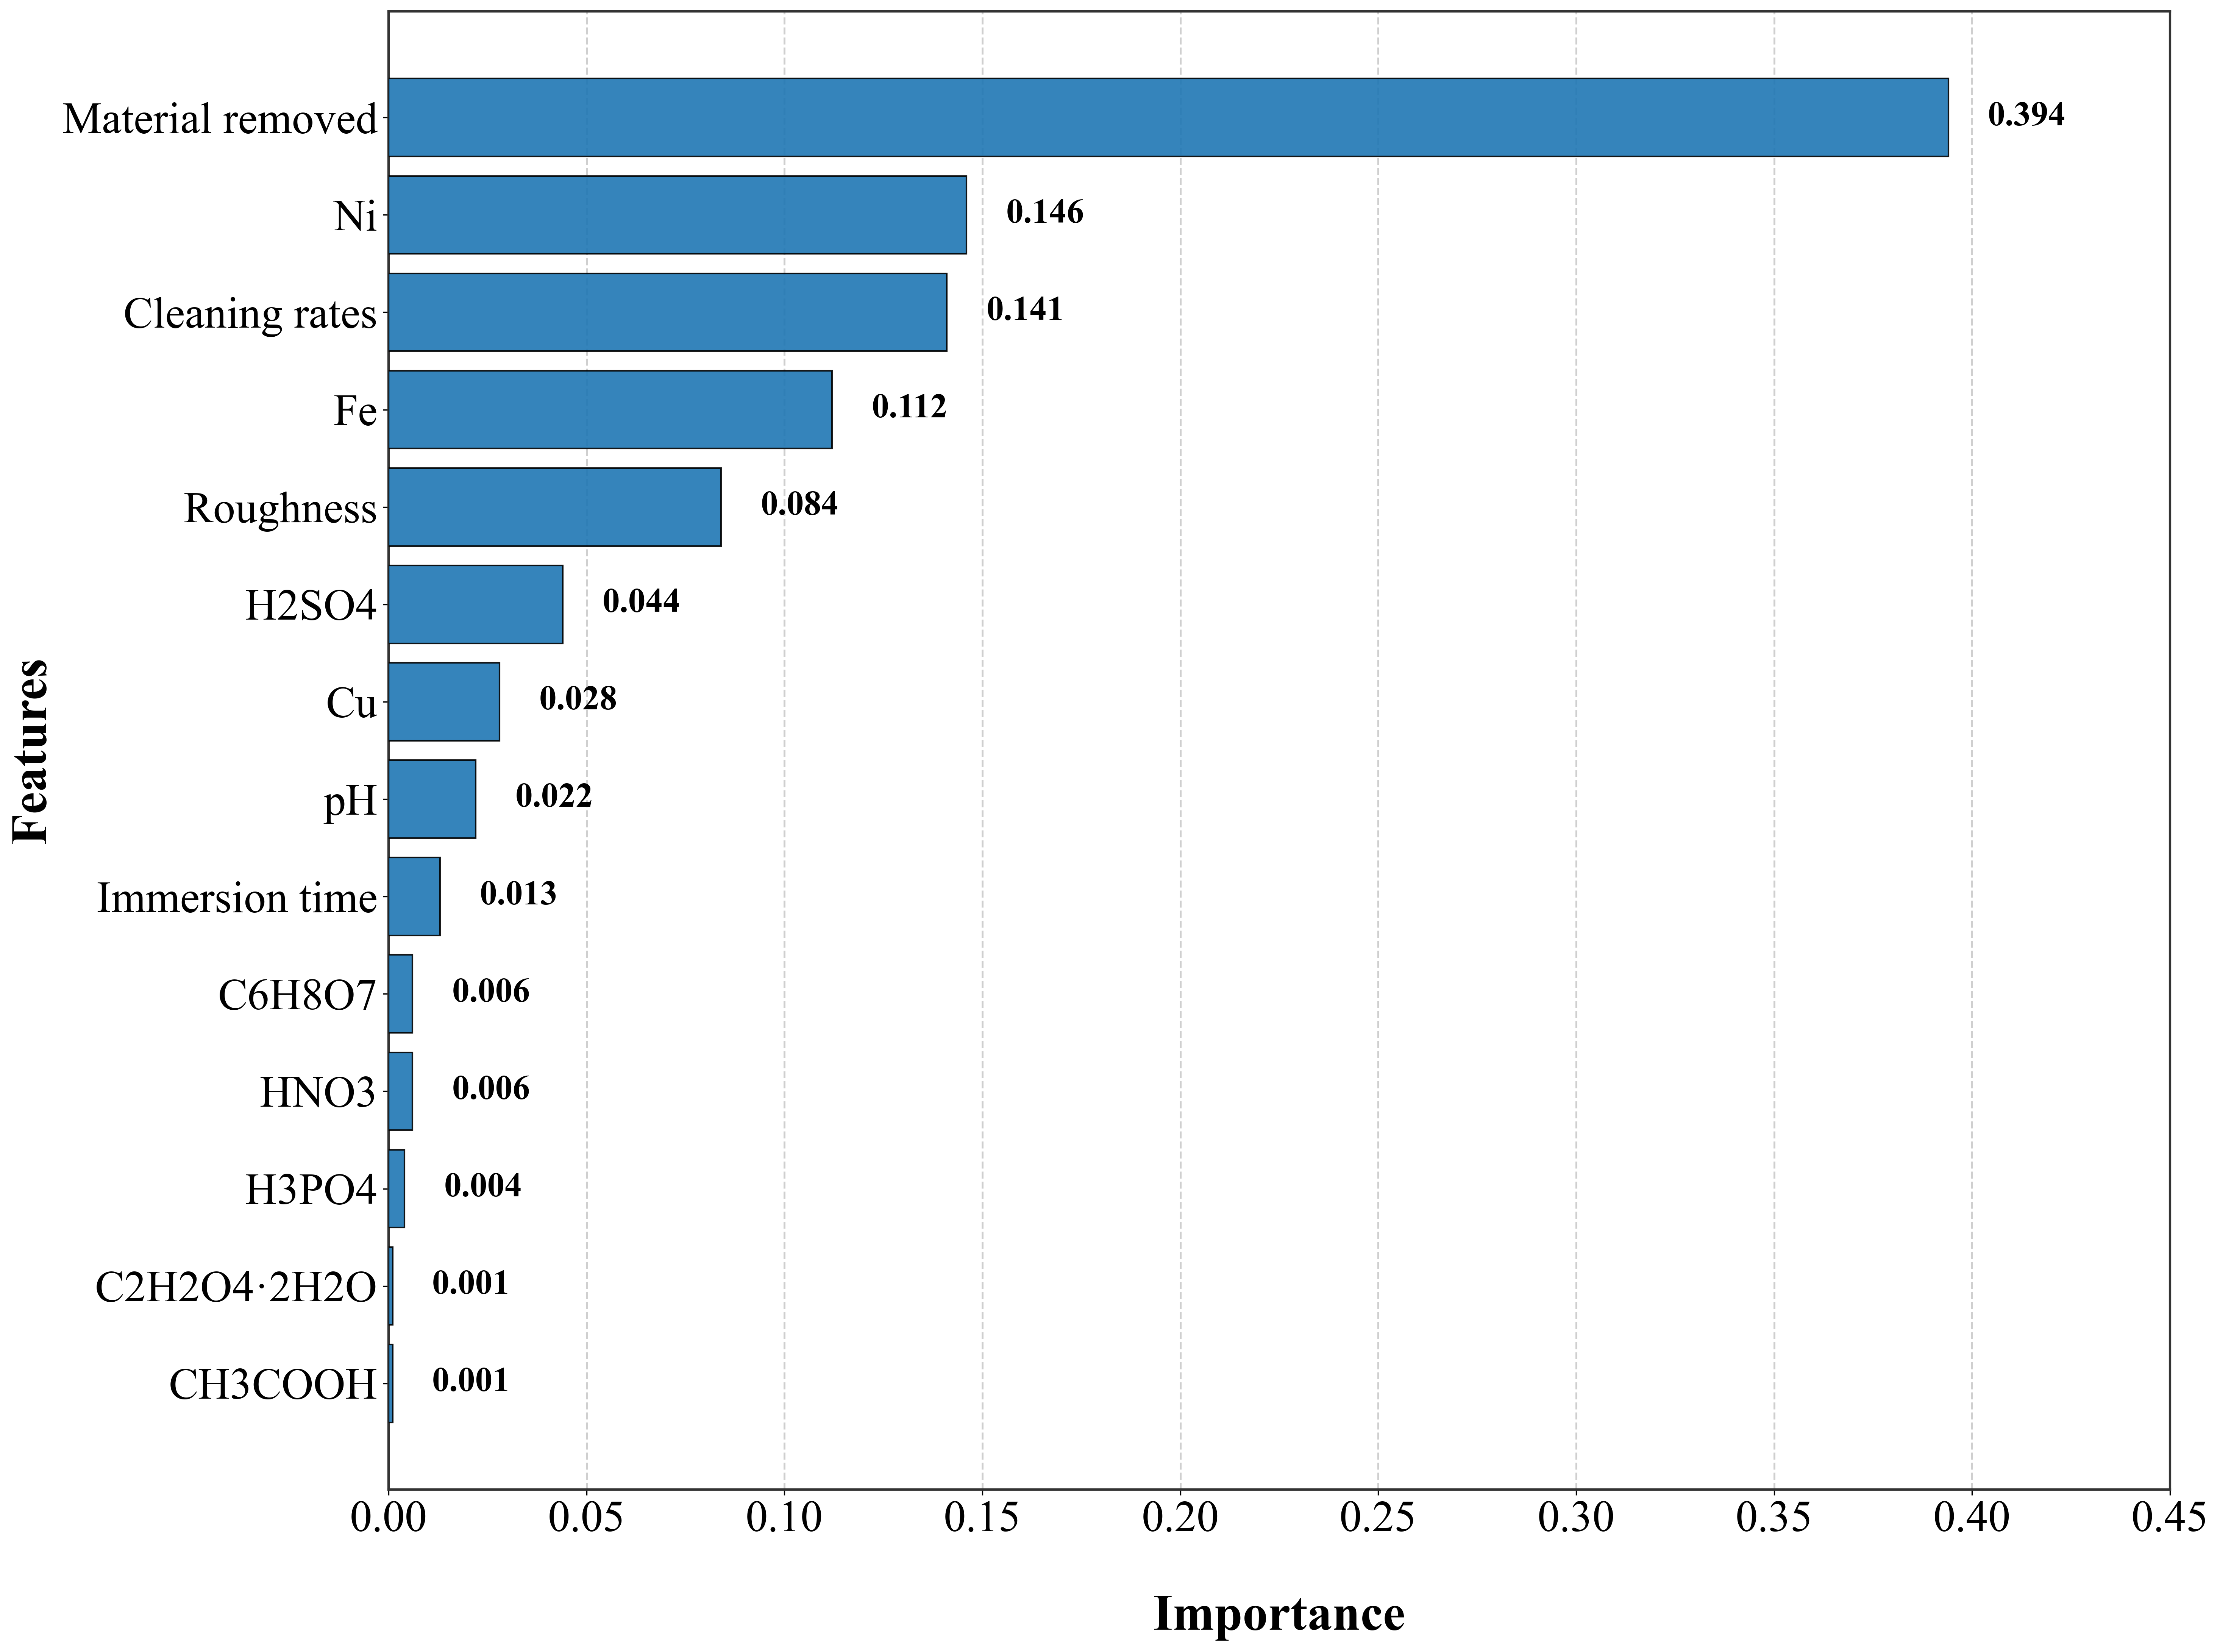

In [19]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 设置全局字体为 Times New Roman
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 22,
    "axes.labelsize": 32,
    "axes.titlesize": 36,
    "xtick.labelsize": 28,
    "ytick.labelsize": 28,
    "figure.dpi": 300,
    "axes.edgecolor": "#333333",
    "axes.linewidth": 1.5
})

# 假设 dataset 是包含特征和目标变量的 DataFrame
feature_names = dataset.columns[:-1]  # 假设最后一列为目标变量

# 数据校验：确保特征名称与 X_train 列数一致
if len(feature_names) != X_train.shape[1]:
    raise ValueError(f"特征名称数量（{len(feature_names)}）与 X_train 列数（{X_train.shape[1]}）不匹配！")

# 训练随机森林模型并获取特征重要性
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_  # 明确变量名

# 创建特征重要性数据框
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=True)  # 升序排列便于条形图展示

# 保留三位小数
importance_df['importance'] = np.around(importance_df['importance'], decimals=3)

# 创建红色渐变色调色板（反向渐变，重要性高的颜色更深）
orange_cyan_palette = sns.diverging_palette(22, 160, s=80, l=65, as_cmap=True)

# 创建画布并调整尺寸
plt.figure(figsize=(20, 15), dpi=300)  # 增大画布避免标签重叠

# 绘制水平条形图
bars = plt.barh(
    y=importance_df['feature'],
    width=importance_df['importance'],
    # color=red_palette,
    edgecolor='black',
    alpha=0.9,
    zorder=3  # 确保条形图在网格上方
)

# 添加数值标签（自动调整位置避免重叠）
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.01,  # 右侧偏移量
        bar.get_y() + bar.get_height()/2,
        f'{width:.3f}',
        ha='left',
        va='center',
        fontsize=22,
        fontweight='bold',
        color='black'
    )

# 添加网格线
plt.grid(axis='x', linestyle='--', alpha=0.6, linewidth=1.2, zorder=0)

# 设置坐标轴标签和标题
plt.xlabel('Importance', fontweight='bold', labelpad=35)
plt.ylabel('Features', fontweight='bold')  # 微调标签间距

# 调整子图布局
plt.subplots_adjust(left=0.22, right=0.95, top=0.9, bottom=0.1)  # 优化整体边距

# 其他代码保持不变...

# 优化 y 轴标签显示（取消旋转或调整旋转角度）
plt.yticks(rotation=0)  # 垂直显示标签，避免旋转导致的可读性问题

# 设置横坐标范围，最大值为0.45
plt.xlim(0, 0.45) 

# 移除白边并保存图像
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Recursive elimination method

最优特征数量: 14, 最小MSE: 7.5920


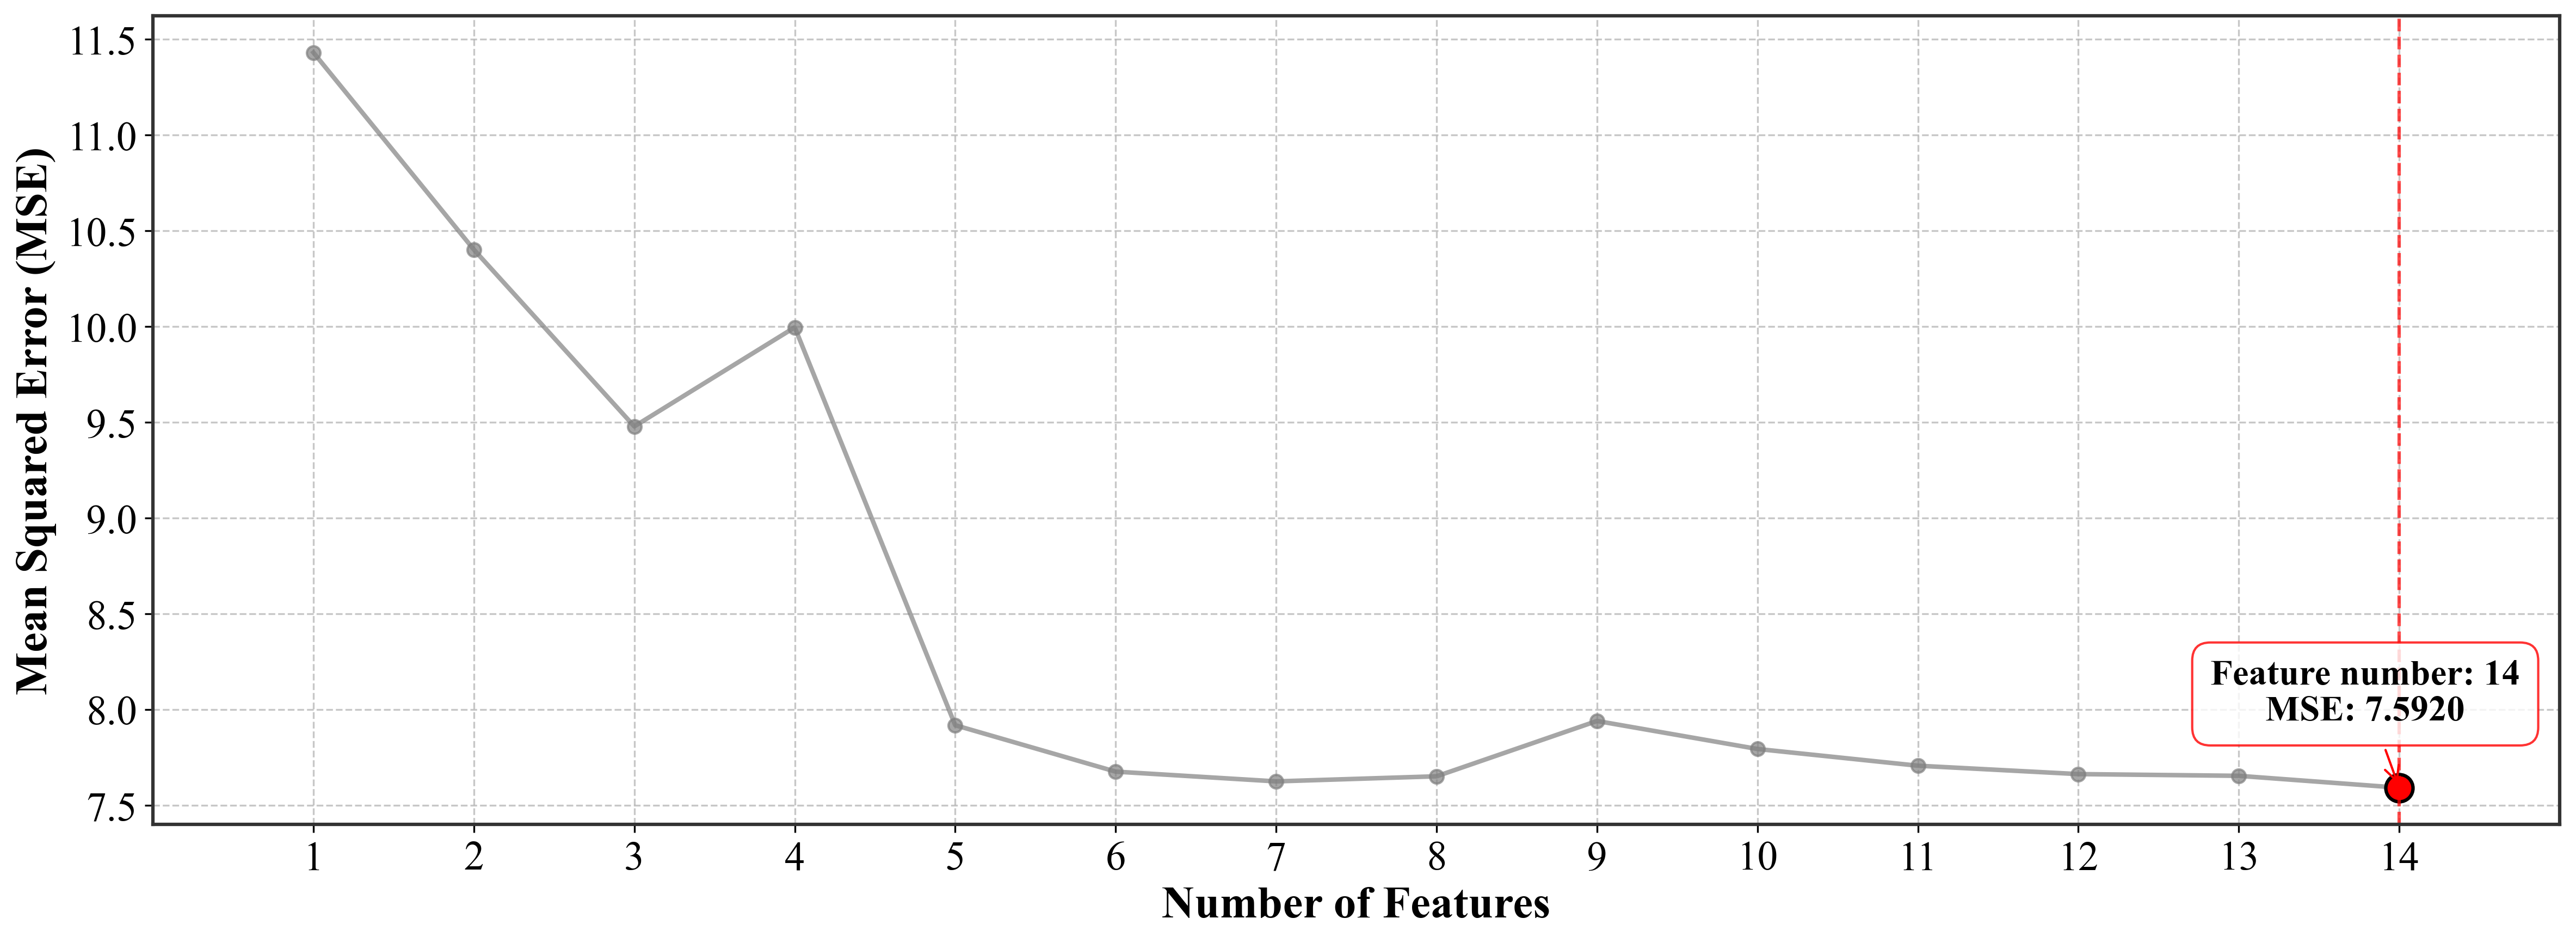

In [12]:
# 数据划分
y = dataset['Corrosion rate']
X = dataset.drop(['Corrosion rate'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=150
)

# 归一化
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# 递归特征消除（RFE）
estimator = RandomForestRegressor(random_state=42)
score = []
n_features_range = range(1, 15)  # 特征数范围1到15

for n_features in n_features_range:
    selector = RFE(estimator, n_features_to_select=n_features, step=1)
    X_train_rfe = selector.fit_transform(X_train_scaled, y_train)
    
    cv_scores = cross_val_score(
        estimator, X_train_rfe, y_train, 
        cv=5, scoring='neg_mean_squared_error'
    )
    mse = -np.mean(cv_scores)
    score.append(mse)

# 找到最优特征数量
min_mse = np.min(score)
optimal_n_features = n_features_range[score.index(min_mse)]
print(f"最优特征数量: {optimal_n_features}, 最小MSE: {min_mse:.4f}")

# 设置全局字体为Times New Roman
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 14,
    "axes.labelsize": 20,
    "axes.titlesize": 24,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "figure.dpi": 300
})

# 绘制特征数量与MSE的关系图
plt.figure(figsize=(16, 6))
plt.plot(n_features_range, score, marker='o', color='gray', linewidth=2, markersize=6, alpha=0.7)

# 突出显示最优特征点
plt.plot(optimal_n_features, min_mse, 'o', color='red', markersize=12, markeredgecolor='black', markeredgewidth=1.5)

# 只标注最优特征点，使用完整信息和红色边框
plt.annotate(
    f'Feature number: {optimal_n_features}\nMSE: {min_mse:.4f}',
    xy=(optimal_n_features, min_mse),
    xytext=(-15, 30),  # 向上偏移30个点，避免遮挡横坐标
    textcoords='offset points',
    ha='center',
    fontsize=16,
    fontweight='bold',
    bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='red', alpha=0.8),
    arrowprops=dict(arrowstyle='->', color='red', connectionstyle='arc3,rad=0')
)

# 添加垂直虚线指示最优特征数
plt.axvline(x=optimal_n_features, color='red', linestyle='--', alpha=0.7)

# 设置坐标轴标签和标题
plt.xlabel('Number of Features', fontweight='bold')
plt.ylabel('Mean Squared Error (MSE)', fontweight='bold')

# 优化坐标轴范围和刻度（与特征数范围匹配）
plt.xlim(0, 15)  # x轴范围1-11，与特征数范围一致
plt.xticks(n_features_range)  # 显示所有特征数刻度
plt.grid(True, linestyle='--', alpha=0.7)

# 保存图像并显示
plt.tight_layout()
plt.savefig("RFE_Optimal_Features.png", dpi=300, bbox_inches='tight')
plt.show()